References:
https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection#

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into pandas dataframe

data_url = "https://raw.githubusercontent.com/nishilp/Datascience06/master/data/art_daily_flatmiddle.csv"
raw_data = pd.read_csv(data_url)

In [3]:
raw_data.head(5)

,timestamp,value
0,2014-04-01 00:00:00,-21.048383
1,2014-04-01 00:05:00,-20.295477
2,2014-04-01 00:10:00,-18.127229
3,2014-04-01 00:15:00,-20.171665
4,2014-04-01 00:20:00,-21.223762


In [4]:
raw_data.dtypes

timestamp     object
value        float64
dtype: object

In [5]:
# Check total number of rows and columns. This frame has 5320 rows and 14 columns

raw_data.shape

(4032, 2)

In [6]:
# Check rows with missing attribute values

raw_data.isnull().sum(axis=0)

timestamp    0
value        0
dtype: int64

In [7]:
final_data = raw_data
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'])

In [8]:
final_data.head(5)

,timestamp,value
0,2014-04-01 00:00:00,-21.048383
1,2014-04-01 00:05:00,-20.295477
2,2014-04-01 00:10:00,-18.127229
3,2014-04-01 00:15:00,-20.171665
4,2014-04-01 00:20:00,-21.223762


# Exploratory Data Analysis

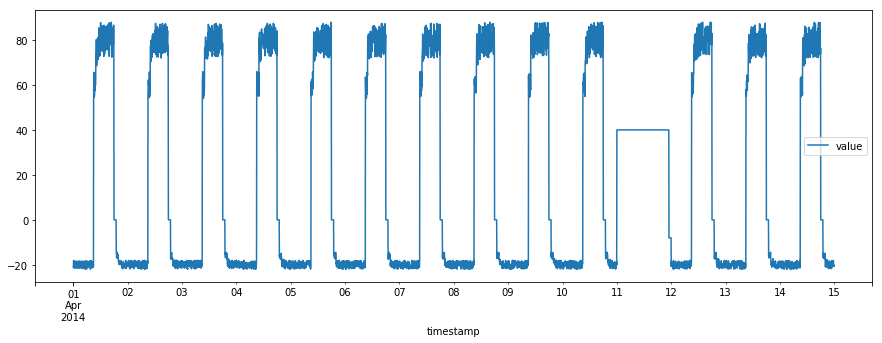

In [9]:
final_data.plot(x='timestamp', y='value', figsize=(15,5))

# Feature Engineering

In [10]:
# the hours and if it's night or day (7:00-22:00)

final_data['hours'] = final_data['timestamp'].dt.hour
final_data['day'] = ((final_data['hours'] >= 7) & (final_data['hours'] <= 22)).astype(int)

In [11]:
# Finding day of week and whether it falls in weekday

final_data['dayofweek'] = final_data['timestamp'].dt.dayofweek
final_data['weekdays'] = (final_data['dayofweek'] < 5).astype(int)

In [12]:
# time with int to plot easily

final_data['time_epoch'] = (final_data['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

# Isolation Forest Model

In [13]:
  # Take useful feature and standardize them 
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest

data = final_data[['value', 'hours', 'day', 'dayofweek', 'weekdays']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = 0.01)
model.fit(data)
# add the data to the main  
final_data['anomaly25'] = pd.Series(model.predict(data))
final_data['anomaly25'] = final_data['anomaly25'].map( {1: 0, -1: 1} )
print(final_data['anomaly25'].value_counts())

0    3989
1      43
Name: anomaly25, dtype: int64


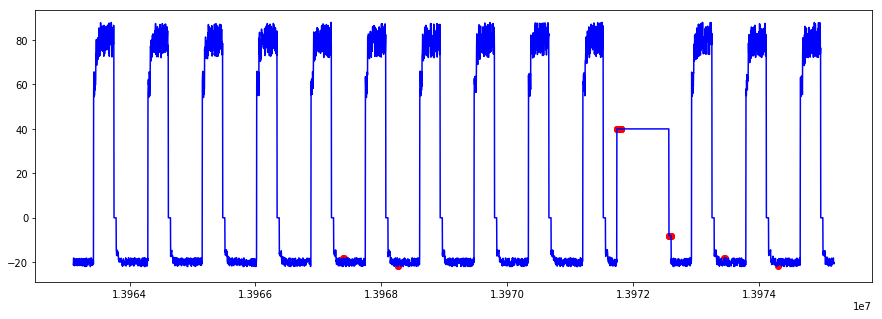

In [19]:
# visualisation of anomaly throughout time (viz 1)


fig, ax = plt.subplots(figsize=(15, 5))

a = final_data.loc[final_data['anomaly25'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(final_data['time_epoch'], final_data['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

# One Class SVM Model

In [21]:
# train one class SVM 

from sklearn.svm import OneClassSVM
model =  OneClassSVM(nu=0.95 * 0.01) #nu=0.95 * outliers_fraction  + 0.05
data = pd.DataFrame(np_scaled)
model.fit(data)
# add the data to the main  
final_data['anomaly26'] = pd.Series(model.predict(data))
final_data['anomaly26'] = final_data['anomaly26'].map( {1: 0, -1: 1} )
print(final_data['anomaly26'].value_counts())

0    3994
1      38
Name: anomaly26, dtype: int64


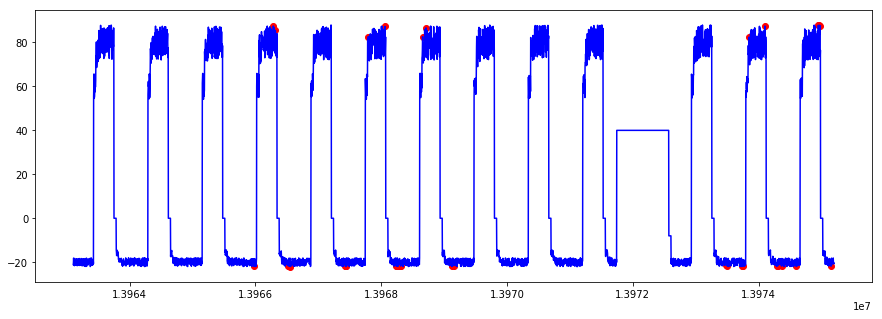

In [22]:
# visualisation of anomaly throughout time (viz 1)


fig, ax = plt.subplots(figsize=(15, 5))

a = final_data.loc[final_data['anomaly26'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(final_data['time_epoch'], final_data['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()

# Summary

Isolation Forest: Detected 43 Anomalies out of 4032 
One Class SVM: Detected 38 Anomalies out of 4032 